Modelo 'modelo_diabetes' treinado com sucesso.
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.50      0.67         2

    accuracy                           0.95        20
   macro avg       0.97      0.75      0.82        20
weighted avg       0.95      0.95      0.94        20

Matriz de Confusão:
[[18  0]
 [ 1  1]]
Acurácia: 0.95


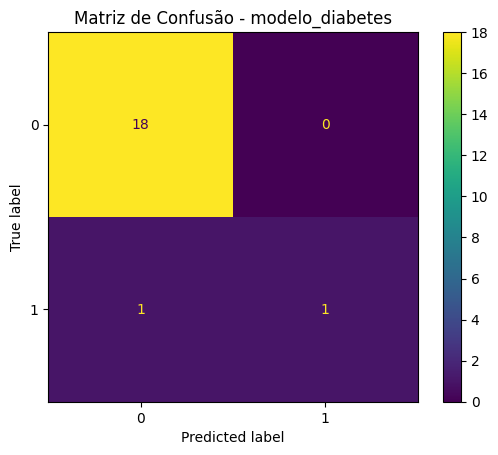

Modelo 'modelo_hipertensao' treinado com sucesso.
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.69      0.75      0.72        12
           1       0.57      0.50      0.53         8

    accuracy                           0.65        20
   macro avg       0.63      0.62      0.63        20
weighted avg       0.64      0.65      0.65        20

Matriz de Confusão:
[[9 3]
 [4 4]]
Acurácia: 0.65


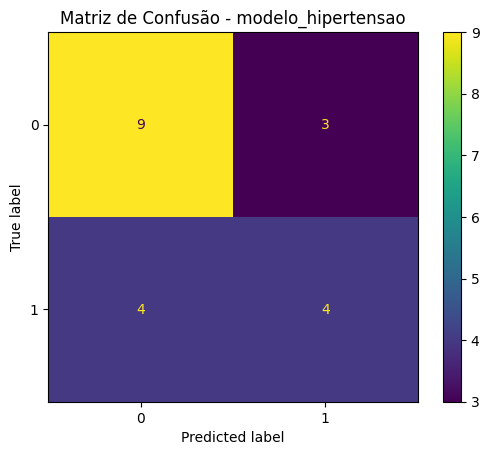

C:\Users\deyvi\AppData\Local\Temp\ipykernel_17656\1986838352.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return df.replace({'F': 0, 'M': 1})


Modelo 'modelo_drc' treinado com sucesso.
Relatório de Classificação:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        20

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Matriz de Confusão:
[[ 0  0]
 [ 0 20]]
Acurácia: 1.00


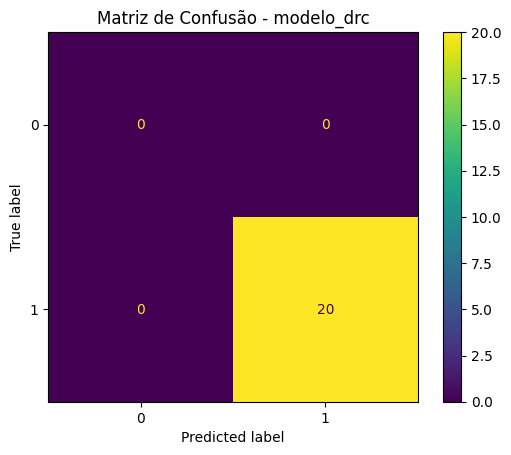

Modelo 'modelo_dpoc' treinado com sucesso.
Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        13

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Matriz de Confusão:
[[ 7  0]
 [ 0 13]]
Acurácia: 1.00


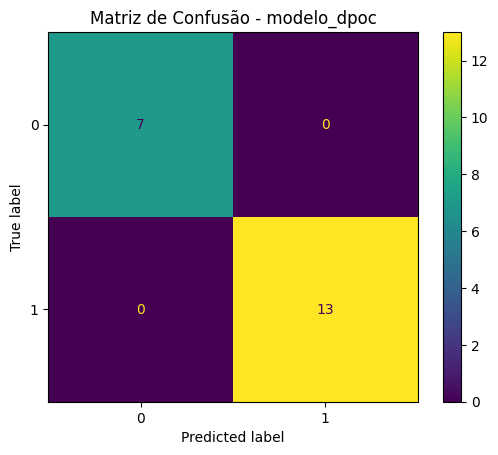

Modelo 'modelo_asma' treinado com sucesso.
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.86      0.75      0.80         8
           1       0.85      0.92      0.88        12

    accuracy                           0.85        20
   macro avg       0.85      0.83      0.84        20
weighted avg       0.85      0.85      0.85        20

Matriz de Confusão:
[[ 6  2]
 [ 1 11]]
Acurácia: 0.85


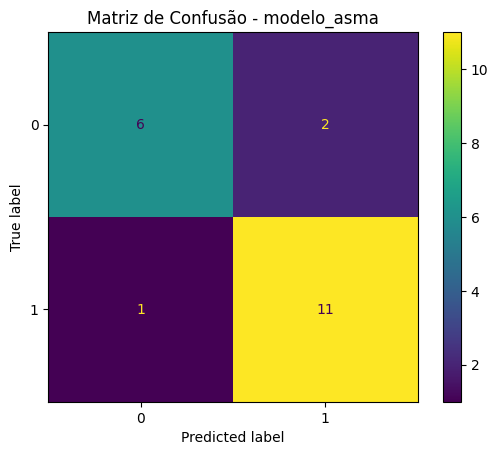

C:\Users\deyvi\AppData\Local\Temp\ipykernel_17656\1986838352.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return df.replace({'feminino': 0, 'masculino': 1})


Modelo 'modelo_obesidade' treinado com sucesso.
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        12
           1       0.86      0.75      0.80         8

    accuracy                           0.85        20
   macro avg       0.85      0.83      0.84        20
weighted avg       0.85      0.85      0.85        20

Matriz de Confusão:
[[11  1]
 [ 2  6]]
Acurácia: 0.85


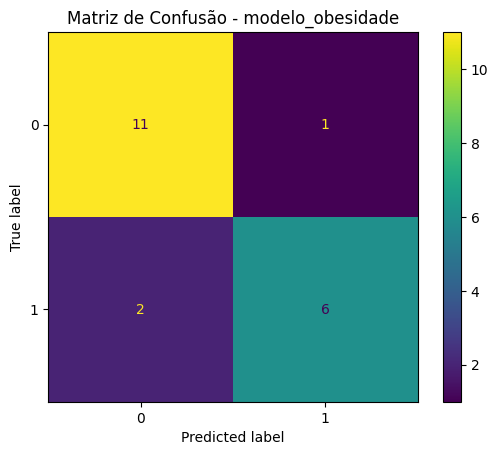

Modelo 'modelo_aids' treinado com sucesso.
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.87      0.93      0.90        14

    accuracy                           0.85        20
   macro avg       0.83      0.80      0.81        20
weighted avg       0.85      0.85      0.85        20

Matriz de Confusão:
[[ 4  2]
 [ 1 13]]
Acurácia: 0.85


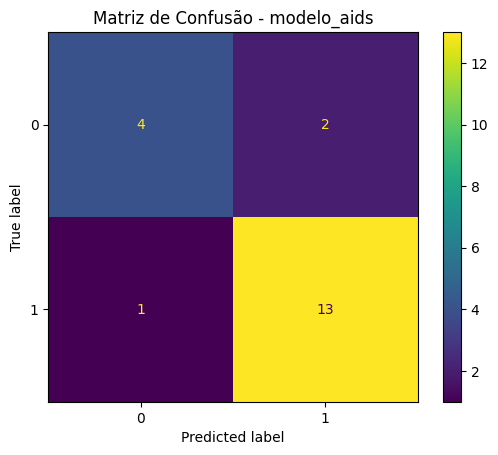

Modelo 'modelo_ossea' treinado com sucesso.
Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      0.27      0.43        11
           1       0.53      1.00      0.69         9

    accuracy                           0.60        20
   macro avg       0.76      0.64      0.56        20
weighted avg       0.79      0.60      0.55        20

Matriz de Confusão:
[[3 8]
 [0 9]]
Acurácia: 0.60


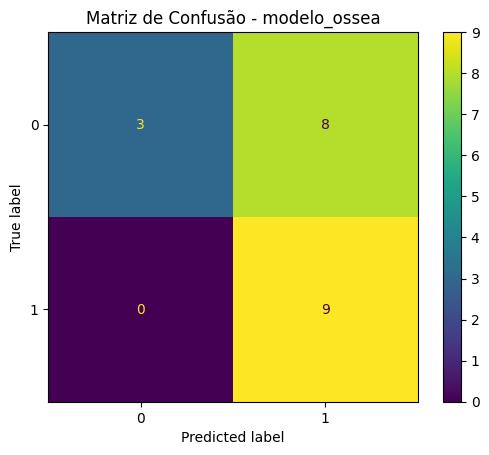

Modelo 'modelo_cardiovascular' treinado com sucesso.
Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           1       0.83      1.00      0.91        15

    accuracy                           0.85        20
   macro avg       0.92      0.70      0.74        20
weighted avg       0.88      0.85      0.82        20

Matriz de Confusão:
[[ 2  3]
 [ 0 15]]
Acurácia: 0.85


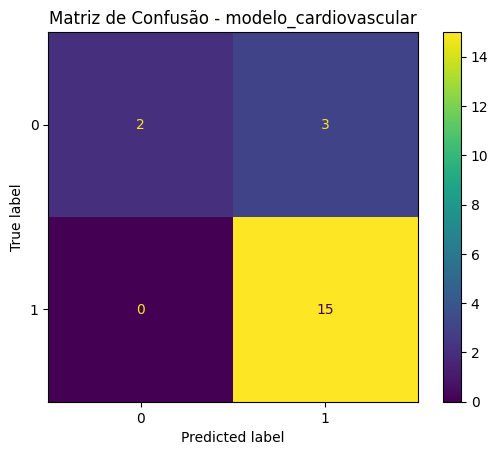

In [1]:
# ////////////////////////////// TREINAR E CRIAR OS MODELOS ///////////////////////////////////

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import joblib
import os
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def binarizar_colunas(df):
    # Converte 'sim' para 1, 'nao' para 0
    return df.replace({'sim': 1, 'não': 0})

def binarizar_colunas2(df):
    # Converte 'masculino' para 1, 'feminino' para 0
    return df.replace({'F': 0, 'M': 1})

def binarizar_colunas3(df):
    # Converte 'masculino' para 1, 'feminino' para 0
    return df.replace({'feminino': 0, 'masculino': 1})


def treinar_modelo(path_csv, coluna_alvo, nome_modelo):
    df = pd.read_csv(path_csv)
    df = binarizar_colunas(df)
    df = binarizar_colunas2(df)
    df = binarizar_colunas3(df)

    X = df.drop(columns=[coluna_alvo])
    y = df[coluna_alvo]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)

    os.makedirs("modelos", exist_ok=True)
    joblib.dump(clf, f"modelos/{nome_modelo}.pkl")
    print(f"Modelo '{nome_modelo}' treinado com sucesso.")

    # Avaliação com matriz de confusão
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
    print("Relatório de Classificação:")
    print(classification_report(y_test, y_pred))
    print("Matriz de Confusão:")
    print(cm)
    ac = (cm[0][0] + cm[1][1]) / cm.sum()
    print(f"Acurácia: {ac:.2f}")

    # Exibir matriz graficamente
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"Matriz de Confusão - {nome_modelo}")
    plt.show()


# Treinar para diabetes
treinar_modelo("./dados/dados_diabetes.csv", "tem_diabetes", "modelo_diabetes")

# Treinar para hipertensão
treinar_modelo("././dados/dados_hipertensao.csv", "tem_hipertensao", "modelo_hipertensao")

# Treinar para DRC
treinar_modelo("./dados/dados_drc.csv", "tem_drc", "modelo_drc")

# Treinar para DPOC
treinar_modelo("./dados/dados_dpoc.csv", "tem_dpoc", "modelo_dpoc")

# Treinar para ASMA
treinar_modelo("./dados/dados_asma.csv", "tem_asma", "modelo_asma")

# Treinar para Obesidade
treinar_modelo("./dados/dados_obesidade.csv", "tem_obesidade", "modelo_obesidade")

# Treinar para AIDS
treinar_modelo("./dados/dados_aids.csv", "tem_aids", "modelo_aids")

# Treinar para Óssea
treinar_modelo("./dados/dados_ossea.csv", "tem_doenca_ossea", "modelo_ossea")

# Treinar para Cardiovascular
treinar_modelo("./dados/dados_cardiovascular.csv", "tem_doenca_cardiovascular", "modelo_cardiovascular")
